/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:13:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:13:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages


Accuracy (%) Comparison Table:

SamplingTechnique      RandomOverSampling  RandomOverSampling_imblearn  RandomUnderSampling  RandomUnderSampling_imblearn  SMOTE
Model                                                                                                                           
M1_LogisticRegression               93.46                        93.46                 25.0                          25.0  90.85
M2_DecisionTree                     98.69                       100.00                 75.0                          75.0  97.71
M3_RandomForest                    100.00                       100.00                 25.0                           0.0  99.35
M4_SVM                              66.99                        66.99                  0.0                           0.0  68.63
M5_XGBoost                          99.67                        99.67                 75.0                          75.0  99.02

Best Sampling Technique for Each Model:

M1_LogisticRegression:

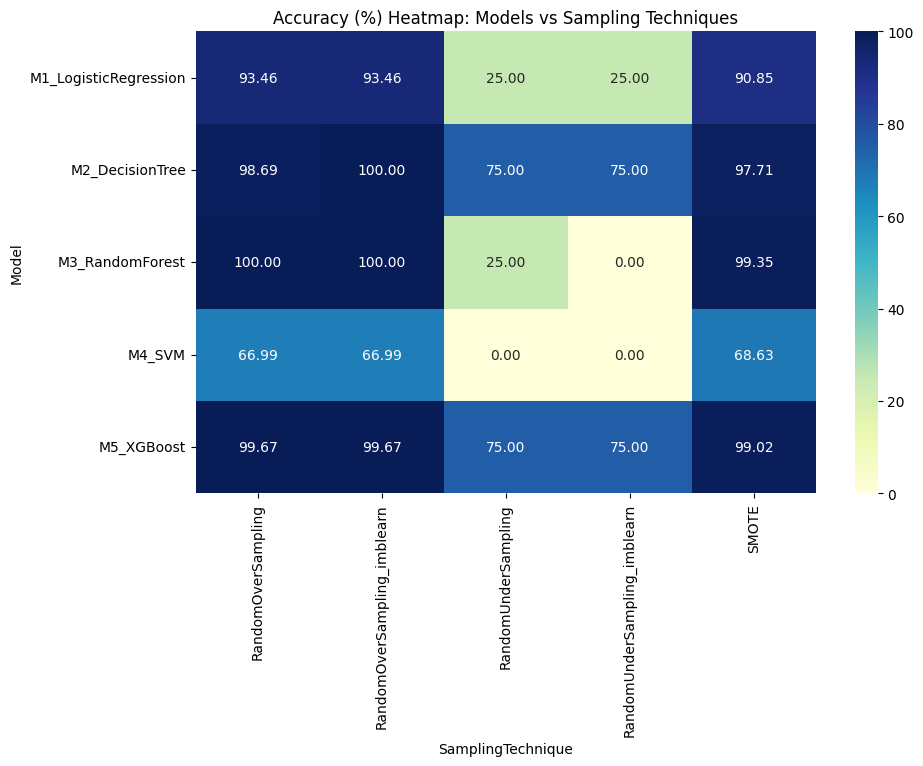

<Figure size 640x480 with 0 Axes>

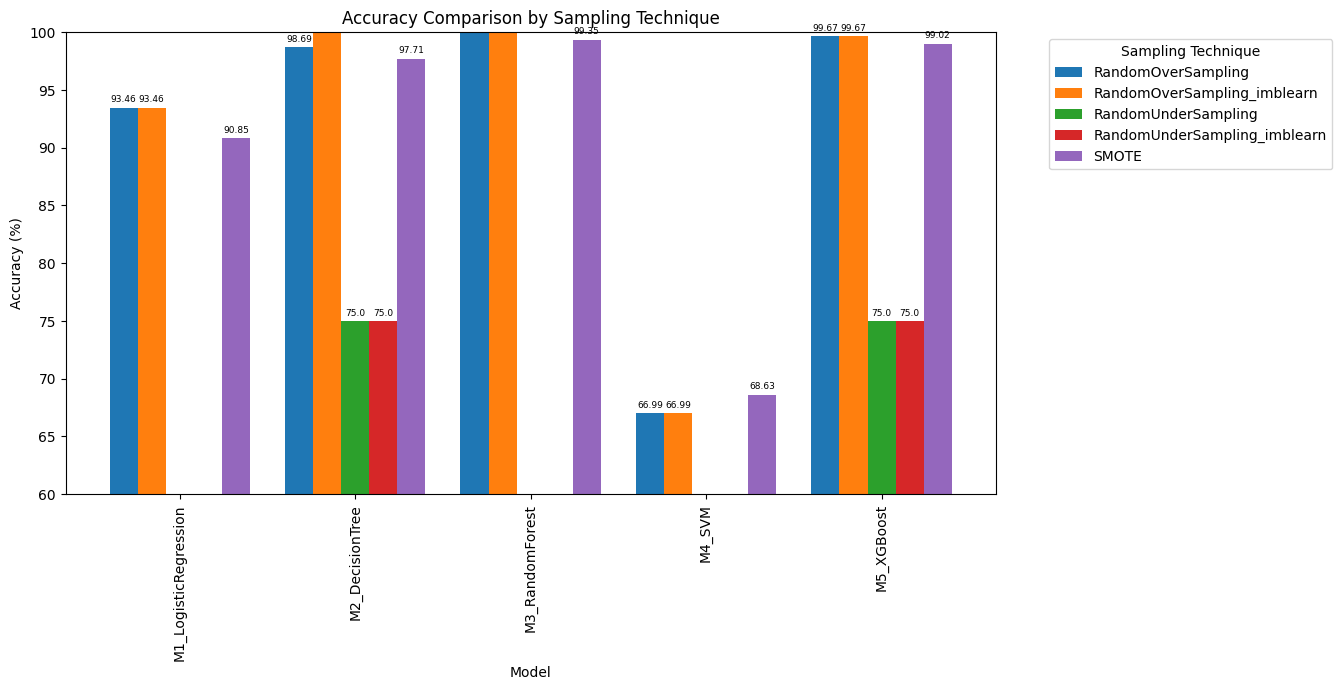

<Figure size 640x480 with 0 Axes>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Sampling Techniques
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Load Dataset
df = pd.read_csv("Creditcard_data.csv")
X = df.drop('Class', axis=1)
y = df['Class']

# Define Sampling Techniques
samplers = {
    "RandomUnderSampling": RandomUnderSampler(random_state=42),
    "RandomOverSampling": RandomOverSampler(random_state=42),
    "RandomUnderSampling_imblearn": RandomUnderSampler(random_state=42),
    "RandomOverSampling_imblearn": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42)
}

# Define Models
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(),
    "M3_RandomForest": RandomForestClassifier(),
    "M4_SVM": SVC(),
    "M5_XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train & Evaluate
results = []

for sampler_name, sampler in samplers.items():
    # Resample dataset
    X_res, y_res = sampler.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([sampler_name, model_name, acc])

# Convert results into DataFrame
df_results = pd.DataFrame(results, columns=["SamplingTechnique", "Model", "Accuracy"])

# Create one single matrix (rows = Models, columns = Sampling Techniques)
pivot_table = df_results.pivot(index="Model", columns="SamplingTechnique", values="Accuracy") * 100

# Print table
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("\nAccuracy (%) Comparison Table:\n")
print(pivot_table.round(2))

# Save results
pivot_table.round(2).to_csv("results_matrix.csv")

# Find best sampling technique for each model
best_results = pivot_table.idxmax(axis=1)
best_accuracy = pivot_table.max(axis=1)

print("\nBest Sampling Technique for Each Model:\n")
for model in pivot_table.index:
    print(f"{model}: {best_results[model]} with Accuracy = {best_accuracy[model].round(2)}%")

# Visualize results with Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table.round(2), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy (%) Heatmap: Models vs Sampling Techniques")
plt.show()
plt.savefig("accuracy_heatmap.png", dpi=300, bbox_inches='tight')

# Visualize results with Bar Graph
import matplotlib.pyplot as plt
ax = pivot_table.plot(kind="bar", figsize=(12,6), width=0.8)

plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison by Sampling Technique")
plt.legend(title="Sampling Technique", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.3),
                ha='center', va='bottom', fontsize=6.5, color='black')

plt.ylim(60, 100)
plt.show()
plt.savefig("accuracy_bargraph.png", dpi=300, bbox_inches='tight')